In [1]:
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
C:\Users\machy\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\machy\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\machy\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\machy\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train,_),(X_test,_) = fashion_mnist.load_data()

In [3]:
# Prepare datasets
# This step contains normalization and reshaping of input.
# For output, it is important to change number to one-hot vector. 
X_train = X_train.astype('float32') / 255
#X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.astype('float32') / 255
#X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = np.reshape(X_train, (-1, 28, 28, 1))
X_test = np.reshape(X_test, (-1, 28, 28, 1))
#y_train = np_utils.to_categorical(y_train, 10)
#y_test = np_utils.to_categorical(y_test, 10)

In [4]:
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [5]:
input_img = Input(shape=(28,28,1))
x = Conv2D(16,(3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same', name='encoder')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True)

# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#     'dataset/fashionmnist/FashionMNIST',
#     target_size=(64, 64),
#     batch_size=32,
#     class_mode='binary')

In [7]:
#Reshape((224,224,3), input_shape=(160,320,3)
#autoencoder.fit(X_train, X_train, epochs=2, batch_size=32, callbacks=None )

In [8]:
#autoencoder.save('autoencoder.h5')
autoencoder.load_weights('autoencoder.h5')

In [9]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
encoder (MaxPooling2D)       (None, 4, 4, 8)           0   

In [10]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoder').output)

In [11]:
#encoder.save('encoder.h5')

In [12]:
#query = X_test[11]

In [13]:
#plt.imshow(query.reshape(28,28), cmap='gray')

In [14]:
#X_test.shape

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)
X_test_itr=test_datagen.flow_from_directory(
    'classes',
    target_size=(28, 28),
    batch_size=500,
    color_mode='grayscale',
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    'classes',
    target_size=(28, 28),
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary')
print(validation_generator)
print(X_test_itr)

Found 500 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [16]:
X_test, X_test_L = X_test_itr.next()

In [17]:
X_test.shape

(500, 28, 28, 1)

In [18]:
codes = encoder.predict(X_train)

In [19]:
codes.shape

(60000, 4, 4, 8)

In [20]:
query_codes = encoder.predict(X_test)

In [21]:
query_codes.shape

(500, 4, 4, 8)

In [22]:
from sklearn.neighbors import NearestNeighbors
n_neigh = 1
codes = codes.reshape(-1, 4*4*8); print(codes.shape)
query_codes = query_codes.reshape(-1, 4*4*8); print(query_codes.shape)

(60000, 128)
(500, 128)


In [23]:
#function to calculate euclidean distance
# def euclidean_distance(a, b):
#     return sqrt(sum((v1-v2)**2 for v1, v2 in zip(a,b)))

In [24]:
nbrs = NearestNeighbors(n_neighbors=n_neigh).fit(codes)
cs = []
ed = []
for i in range(500):
    distances, indices = nbrs.kneighbors(np.array(query_codes[i].reshape(-1,128)))
    closest_images = X_train[indices]
    closest_images = closest_images.reshape(-1,28,28,1);
    #print(closest_images.shape)
    codes1 = encoder.predict(closest_images)
    query_code1 = encoder.predict(X_test[i].reshape(1,28,28,1))
    #print(query_code1.shape)
    query_code1_temp = query_code1.reshape(128)
    #print(query_code1_temp)
    codes1_temp = codes1[0].reshape(128)
    #print(codes1_temp.shape)
    #print(type(codes1_temp))
    cs.append(np.dot(codes1_temp, query_code1_temp) / (np.linalg.norm(codes1_temp) * np.linalg.norm(query_code1_temp)))
    ed.append(np.linalg.norm(codes1_temp - query_code1_temp))

In [25]:
# query_code1_temp
# print(codes1_temp)

In [26]:
print(cs)
print(sum(cs)/len(cs))

[0.9992554, 0.9972978, 0.9945206, 0.9989648, 0.9987856, 0.9981442, 0.9972508, 0.9975842, 0.99200964, 0.99131143, 0.9938617, 0.99797654, 0.9939517, 0.9969734, 0.99435276, 0.9967792, 0.99631226, 0.9989326, 0.9991894, 0.9978263, 0.99915266, 0.994236, 0.993302, 0.99611473, 0.9966247, 0.99818647, 0.99835825, 0.9952413, 0.9980842, 0.998175, 0.99826837, 0.9985642, 0.9978501, 0.9982111, 0.99820536, 0.99180484, 0.99838644, 0.9978395, 0.9953052, 0.9956685, 0.99542874, 0.9930394, 0.99870926, 0.9981498, 0.9970625, 0.99604017, 0.9974163, 0.99240667, 0.9899623, 0.9975716, 0.9985788, 0.99085796, 0.9980691, 0.99699116, 0.9975748, 0.9976283, 0.9972555, 0.9984121, 0.99381316, 0.99336153, 0.9978093, 0.99719507, 0.9988686, 0.99808174, 0.97648895, 0.9974944, 0.9971638, 0.9976537, 0.9987202, 0.9973135, 0.99758554, 0.9956108, 0.99658, 0.9988671, 0.9864653, 0.9974415, 0.99773836, 0.99266714, 0.9953491, 0.9966025, 0.9924313, 0.97473633, 0.9981988, 0.9951169, 0.9973994, 0.9977059, 0.9979221, 0.98685163, 0.99743

In [27]:
print(ed)
print(sum(ed)/len(ed))

[0.9379134, 1.4740623, 1.5278445, 0.95978594, 1.161313, 1.0406568, 1.709637, 1.5915484, 1.8227338, 2.2711303, 1.8161194, 1.1339836, 1.8796811, 1.7712125, 2.0137422, 0.97424614, 1.7468705, 0.86628854, 0.9643784, 1.2325917, 1.0712061, 2.349603, 2.203097, 1.2826216, 1.5049968, 1.2284833, 1.1384952, 1.9950213, 1.291977, 1.0683604, 1.4029468, 1.1844312, 1.4393873, 1.4025685, 1.2783276, 2.0621898, 1.1553955, 1.4118354, 1.7679033, 1.4823215, 2.0344403, 2.240429, 1.252208, 1.4748976, 1.5048141, 1.577304, 1.4877901, 1.9693328, 2.1972387, 1.4498969, 1.2292638, 2.8693347, 1.4692013, 1.7044394, 1.2845763, 1.4440062, 1.8366895, 1.2487116, 1.8318459, 2.1532815, 1.2895101, 1.4832723, 0.9911993, 1.4807546, 4.056384, 1.3293396, 1.7179946, 1.2307351, 0.9419636, 1.4311101, 1.434965, 2.0481644, 1.7055552, 0.9774106, 3.0329256, 1.200859, 1.1412764, 2.702597, 1.8330061, 1.8279521, 2.2575338, 3.394099, 1.4408123, 2.358427, 1.6649626, 1.7971917, 1.3513193, 2.4077094, 1.0736643, 2.0418615, 1.9366364, 1.6069642

7.0
[6. 9. 0. 4. 2. 1. 8. 4. 3. 5. 6. 7. 8. 8. 9. 6. 9. 7. 4. 2. 2. 6. 5. 0.
 9. 1. 0. 9. 4. 1. 0. 0. 8. 3. 1. 8. 3. 0. 0. 2. 9. 2. 2. 3. 9. 6. 9. 6.
 0. 0. 4. 7. 6. 9. 6. 7. 2. 1. 6. 6. 7. 2. 7. 6. 0. 3. 3. 5. 1. 3. 6. 8.
 6. 0. 8. 5. 6. 8. 3. 8. 9. 8. 0. 3. 7. 2. 0. 8. 6. 5. 0. 8. 6. 5. 3. 5.
 4. 0. 5. 0. 7. 0. 2. 4. 4. 4. 6. 7. 5. 3. 6. 1. 4. 8. 9. 8. 5. 7. 6. 1.
 4. 0. 1. 3. 8. 4. 4. 8. 1. 3. 7. 9. 2. 9. 9. 1. 8. 2. 9. 5. 2. 3. 8. 2.
 4. 7. 9. 5. 5. 3. 3. 6. 5. 3. 5. 5. 7. 6. 3. 2. 3. 8. 9. 1. 0. 1. 7. 3.
 3. 2. 3. 9. 1. 3. 6. 9. 4. 7. 2. 7. 7. 3. 7. 3. 1. 7. 8. 3. 3. 9. 0. 9.
 0. 1. 5. 4. 7. 5. 4. 3. 6. 5. 3. 6. 1. 9. 2. 1. 2. 1. 3. 1. 7. 0. 0. 2.
 1. 5. 6. 4. 7. 6. 1. 7. 5. 1. 5. 5. 5. 4. 8. 1. 9. 4. 0. 1. 6. 8. 5. 4.
 5. 7. 6. 7. 8. 4. 6. 3. 5. 2. 4. 4. 7. 2. 0. 4. 9. 9. 4. 0. 2. 9. 0. 2.
 5. 4. 0. 7. 5. 8. 5. 5. 3. 8. 0. 0. 0. 3. 8. 8. 3. 2. 8. 9. 3. 8. 1. 5.
 8. 4. 9. 9. 6. 3. 6. 9. 6. 3. 1. 9. 2. 2. 4. 8. 2. 2. 9. 1. 0. 4. 2. 6.
 9. 7. 8. 4. 1. 2. 2. 4. 1. 0. 4. 7. 4. 5. 4. 4

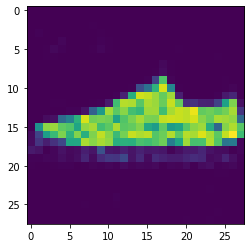

In [28]:
print(X_test_L[499])
plt.imshow(X_test[499].reshape(28,28))
print(X_test_L)

(28, 28, 1)


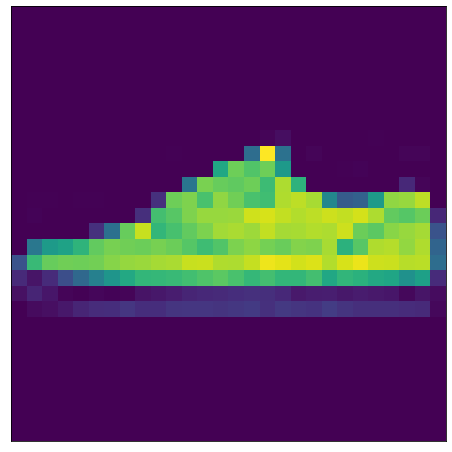

In [29]:
plt.figure(figsize=(20, 8))
for i in range(n_neigh):
    # display original
    ax = plt.subplot(1, n_neigh, i+1)
    plt.imshow(closest_images[i].reshape(28, 28))
    print(closest_images[i].shape)
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()